## Imports

In [4]:
import sys
sys.path.append('..')

import numpy as np
from champ import Field
from pupille import Pupil
from polarizer import Polarizer
from separateur import Separator
from mirror import Mirror
from detecteur import Detector
from slm import SLM
from propagator import Propagator
from masque import *

## Create all the LOOPS material

In [5]:
# DEFINE FIELD'S SIZE
n = 256
# CREATE THE INCIDENT FIELD
f = Field(n, field_map='plan_wave', incidence_angles=[-np.pi/(n),
                                                      -np.pi/(n)])
# CREATE THE ENTRANCE PUPIL
P = Pupil(n, aperture_shape='circular')
# CREATE THE LINEAR POLARIZER
Pol = Polarizer('linear', angle=np.pi/5)
# CREATE THE THREE PELLICLE BEAM SPLITTERS
PBS1 = Separator(transmitance=0.55, reflectance=0.45)
PBS2 = Separator(transmitance=0.55, reflectance=0.45)
PBS3 = Separator(transmitance=0.55, reflectance=0.45)
# CREATE THE SLM WITH A 4-SIDED PYRAMID
Slm = SLM(n, shape='pyramid', pyramid_angle=n/(2*np.sqrt(2)), pyramid_faces=4)
# CREATE THE PYRAMID MASK
Pyr = Pyramid(n, angle=n/(2*np.sqrt(2)), faces=4)
# CREATE THE TWO OCAM DETECTORS AND THE THORLABS
OCAM1 = Detector(n, camera_name='OCAM 1')
OCAM2 = Detector(n, camera_name='OCAM 2')
Thorlabs = Detector(n, camera_name='Thorlabs')

False


# Propagate through the bench

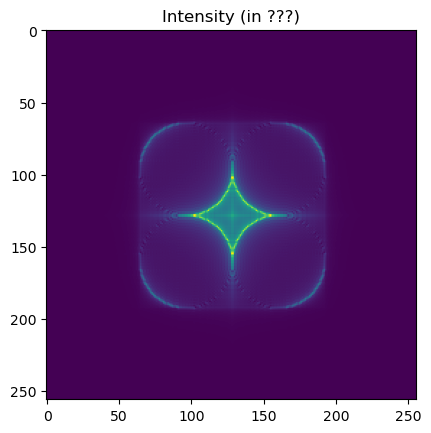

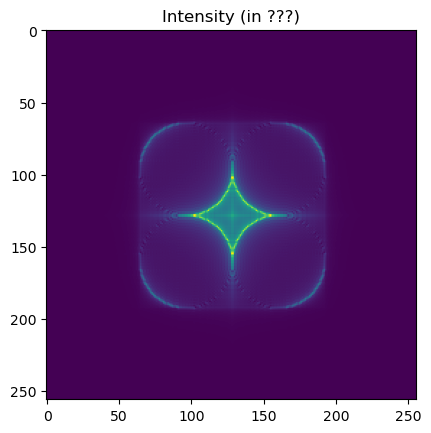

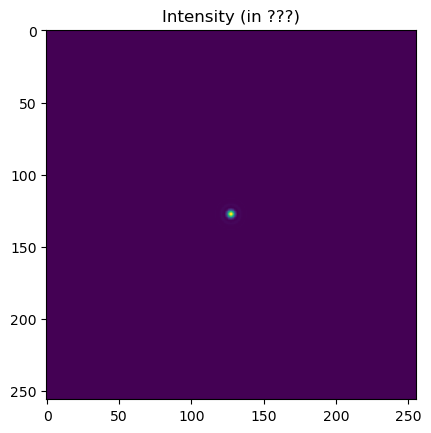

In [6]:
# PROPAGATE THE FIELD THROUGH THE CLASSICAL PYRAMID ARM
f_OCAM1 = (((((f@0) * P) * PBS1.T()) * PBS2.R()) > Pyr) < OCAM1
# PROPAGATE THE FIELD THROUGH THE SLM ARM
f_OCAM2 = (((((((f@0) * P) * PBS1.R()) * PBS3.T()) * Pol) > Slm) *
           PBS3.R()) < OCAM2
# PROPAGATE THE FIELD THROUGH THE MODULATION MONITORING ARM
f_Thorlabs = ((((f@0) * P) * PBS1.T()) * PBS2.T()) > Thorlabs

# OCAM1.disp_intensity()

## Test with different pyramid angle

/Users/pjanin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


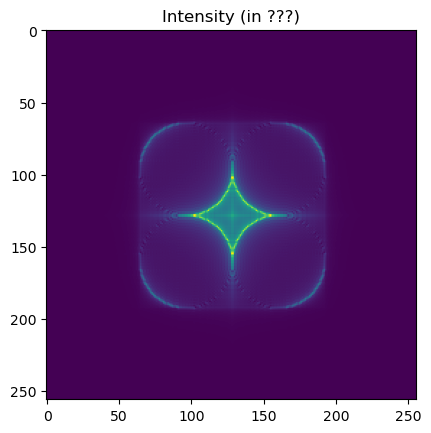

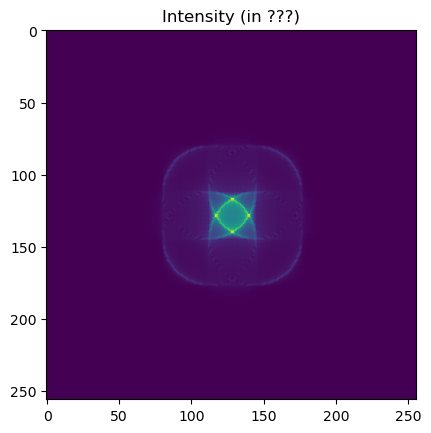

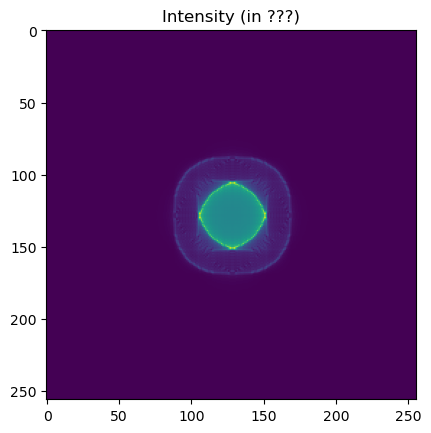

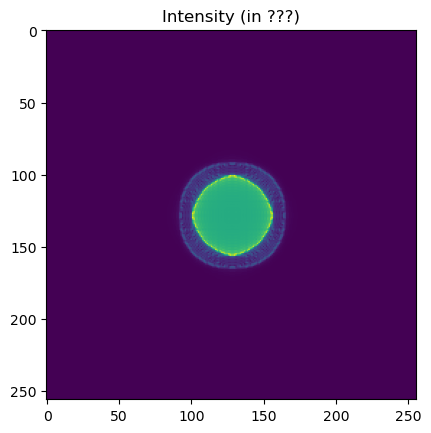

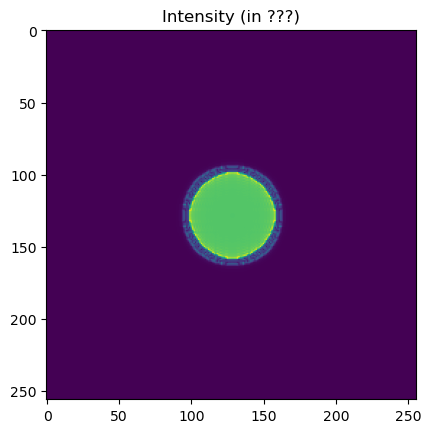

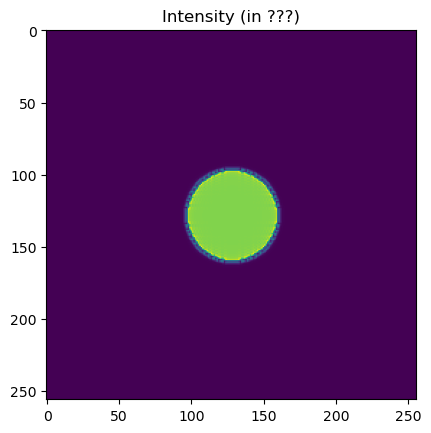

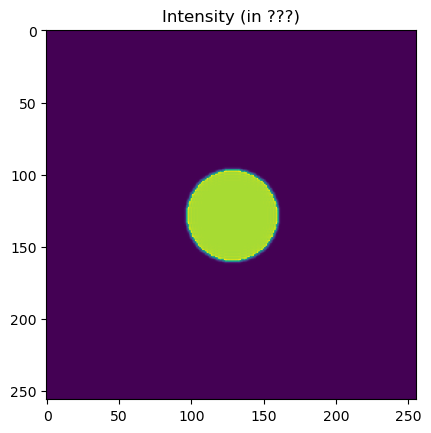

In [7]:
for k in range(1, 8):
    Slm.Pyramid(pyramid_angle=n/(np.sqrt(2)*2**k), pyramid_faces=4)
    +f_OCAM2

## Test different masks

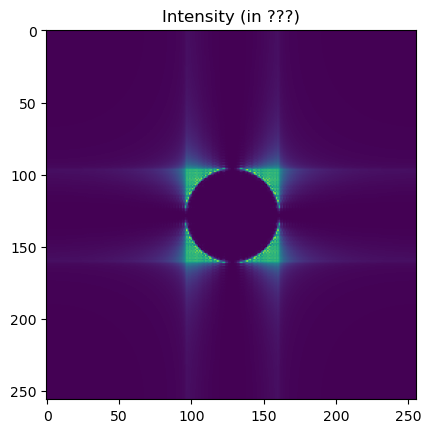

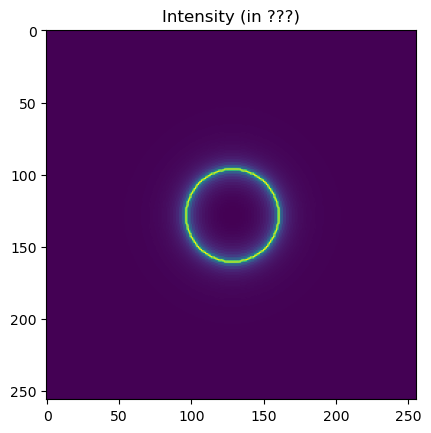

In [8]:
# CHANGE THE MASK ON THE SLM BY A FQPM
Slm.FQPM()
# ACTUALIZE THE FIELD
+f_OCAM2

# CHANGE THE MASK ON THE SLM BY A VORTEX
Slm.Vortex(charge=2)
# ACTUALIZE THE FIELD
+f_OCAM2

## Simulate realistic bench with lenses unperfectly set

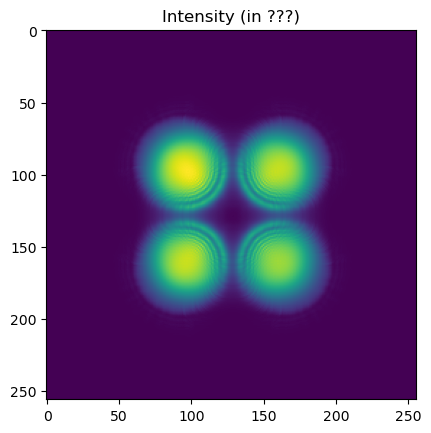

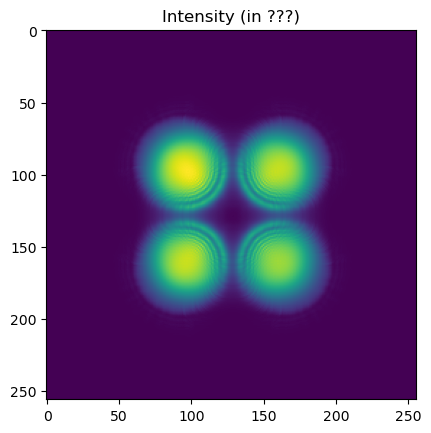

In [9]:
# SIMULATE TEST ARM WITH SLM
# CREATE FIELD
f = Field(n, field_map='gaussian', gaussian_variance=2)
# CREATED TIP-TILT MASK TO CENTER ON THE SLM TOP
tip = Tilt(n, angles=[-1, -1])
# CREATED TIP-TILT MASK TO MODULATE ON THE SLM TOP
mod = TipTiltMirror(n, modulation_shape='circular', modulation_size=20)
# PYRAMID WITH MODULATION
Pyr = Pyramid(n, angle=n/(2*np.sqrt(2)), faces=4)
# ACTUALIZE SLM
Slm.Pyramid(pyramid_angle=n/(2*np.sqrt(2)), pyramid_faces=4)
# DEFINE THE PROPAGATORS
FFT = Propagator('FFT', f)
IFFT = Propagator('IFFT', f)
FST = Propagator('FST', f, z=100e-3)
# DO THE PROPAGATION
((((((((((((f * tip) * IFFT) * FST) * P) * mod) * FST) * Pol) * PBS1.T()) *
            FFT) * Slm) * IFFT) * PBS1.R()) * OCAM2
((((((((((((f@0 * tip) * IFFT) * FST) * P) * mod) * FST) * Pol) * PBS1.T()) *
            FFT) * Pyr) * IFFT) * PBS1.R()) * OCAM1